In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
sports = pd.read_csv("2021국민생활체육조사_사용칼럼2.csv")
sports=sports.dropna(axis=0)
print(sports.shape)
sports=sports.astype('int')
sports

(8998, 11)


,Q32_b,SEX,AGE,Q08,Q131,LOC1,Q11,SEOUL,INCKKD,BUULGYEONG,ELSE
0,1,1,16,4,6,1,1,1,0,0,0
1,1,0,86,1,1,1,2,1,0,0,0
2,0,0,28,7,2,1,2,1,0,0,0
3,1,1,50,1,1,1,2,1,0,0,0
4,1,1,82,7,1,1,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8993,0,0,56,7,1,17,2,0,0,0,1
8994,1,0,46,7,2,17,2,0,0,0,1
8995,1,0,60,7,1,17,2,0,0,0,1
8996,1,1,54,2,1,17,1,0,0,0,1


### Q08, Q131,Q11 더미변수화

In [2]:
sports=pd.get_dummies(sports , columns = ['Q08'])

In [3]:
sports=pd.get_dummies(sports , columns = ['Q131'])

In [4]:
sports=pd.get_dummies(sports , columns = ['Q11'])

In [5]:
sports

,Q32_b,SEX,AGE,LOC1,SEOUL,INCKKD,BUULGYEONG,ELSE,Q08_1,Q08_2,...,Q131_1,Q131_2,Q131_3,Q131_4,Q131_5,Q131_6,Q131_7,Q131_8,Q11_1,Q11_2
0,1,1,16,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,1,0,86,1,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,28,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1,1,50,1,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,1,1,82,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8993,0,0,56,17,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
8994,1,0,46,17,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
8995,1,0,60,17,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
8996,1,1,54,17,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0


### 종속,독립변수 지정

In [6]:
features=sports[['AGE','Q131_1','Q131_2','Q131_3','Q131_4','Q131_5','SEOUL','INCKKD','BUULGYEONG','ELSE',
                 'Q08_1','Q08_2','Q08_3','Q08_4','Q08_5','Q08_6']]
know=sports['Q32_b']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, know,random_state=0)

### 랜덤포레스트

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.6098


In [9]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.6623


In [10]:
#위의 결과로 나온 최적 하이퍼 파라미터로 다시 모델을 학습하여 테스트 세트 데이터에서 예측 성능을 측정
rf_clf1 = RandomForestClassifier(n_estimators = 100, 
                                max_depth = 10,
                                min_samples_leaf = 12,
                                min_samples_split = 8,
                                random_state = 0,
                                n_jobs = -1)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.6658


In [11]:
from sklearn.ensemble import RandomForestClassifier
# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)

#위의 결과로 나온 최적 하이퍼 파라미터로 다시 모델을 학습하여 테스트 세트 데이터에서 예측 성능을 측정
rf_clf1 = RandomForestClassifier(n_estimators = 100, 
                                max_depth = 10,
                                min_samples_leaf = 12,
                                min_samples_split = 8,
                                random_state = 0,
                                n_jobs = -1)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 100}
예측 정확도: 0.6658


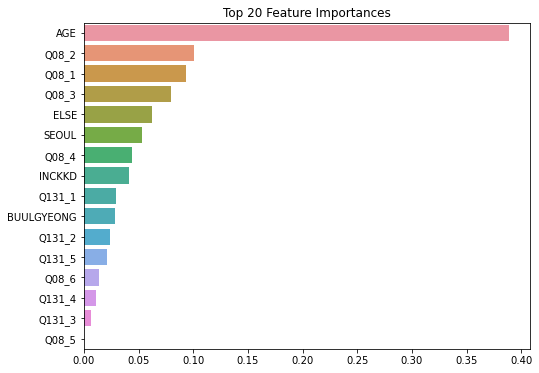

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### Gradient Boost

In [13]:
# Gradient Boosting Classifier 불러오기
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score
import time

# GBM 수행시간 측정을 위함. 시작시간 설정
start_time = time.time()

# 예시 데이터셋 불러오기
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train.values)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {:.1f}초'.format(time.time() - start_time))

GBM 정확도: 0.6684
GBM 수행 시간: 0.7초


In [14]:
from sklearn.model_selection import GridSearchCV
import numpy as np
param = {"max_depth" : range(3,5),
             "learning_rate" : np.linspace(0.1,1,10),
             "n_estimators" :range(5,50,10),
             "max_features":range(1,4)
              }
#Gradient객체 생성후 GridSearchCV수행
gb_clf = GradientBoostingClassifier(random_state=0)
grid_cv = GridSearchCV(gb_clf, param_grid=param, cv=2, verbose=1, n_jobs=-1)
grid_cv.fit(X_train, y_train.values)
print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 300 candidates, totalling 600 fits
최적 하이퍼 파라미터: 
 {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 3, 'n_estimators': 45}
최고 예측 정확도: 0.6632


In [15]:
# GridSearchCV를 이용해 최적으로 학습된 estimators로 예측 수행
gb_clf1=GradientBoostingClassifier(learning_rate= 0.1,
                                   max_depth= 4,
                                   n_estimators= 45,
                                   max_features=3,
                                   random_state=0)
gb_clf1.fit(X_train, y_train.values)
gb_pred = gb_clf1.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.6684


In [16]:
from sklearn.model_selection import GridSearchCV
import numpy as np
param = {"max_depth" : range(3,5),
             "learning_rate" : np.linspace(0.1,1,10),
             "n_estimators" :range(5,50,10),
             "max_features":range(1,4)
              }
#Gradient객체 생성후 GridSearchCV수행
gb_clf = GradientBoostingClassifier(random_state=0)
grid_cv = GridSearchCV(gb_clf, param_grid=param, cv=2, verbose=1, n_jobs=-1)
grid_cv.fit(X_train, y_train.values)
print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)

# GridSearchCV를 이용해 최적으로 학습된 estimators로 예측 수행
gb_clf1=GradientBoostingClassifier(learning_rate= 0.1,
                                   max_depth= 4,
                                   n_estimators= 45,
                                   max_features=3,
                                   random_state=0)
gb_clf1.fit(X_train, y_train.values)
gb_pred = gb_clf1.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

Fitting 2 folds for each of 300 candidates, totalling 600 fits
최적 하이퍼 파라미터: 
 {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 3, 'n_estimators': 45}
GBM 정확도: 0.6684


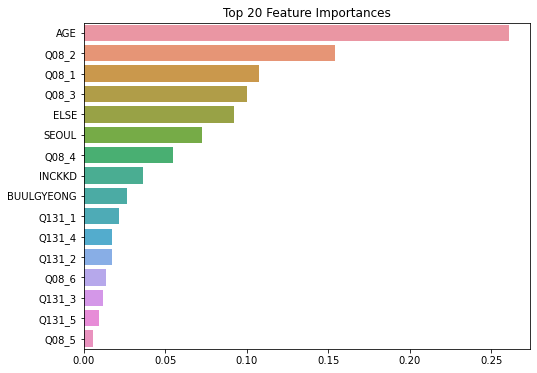

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = grid_cv.best_estimator_.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()